In [1]:
from utils_tables import *
import os 
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
#Set-up
with cd(os.path.join(os.getcwd(),'..')):
    results_path=os.path.join(os.path.join(os.getcwd(),"Ap1"))
    assert os.path.isdir(results_path), "Wrong folder"
#     print(scal_path)
exp_type="Par_Comb_"

cols=["Eff_2","Fit_var"]
metric_list=["MBF","MEff"]
dir_folder=results_path

Parameters=["ELITIST","PR_CROSS","PR_MUT","MBF"]
criteria="CritSum"


In [3]:
class_name_list=[name for name in os.listdir(dir_folder) if exp_type in name]
#create class_list (as dict)
class_dict={}

for class_name in class_name_list:
    class_dict[class_name] = table_class(class_name,results_path,exp_type,metric_list,cols)

In [4]:
df_dict=table_pipeline_basic(class_dict,drop=True)

In [5]:
def_table=pd.concat(df_dict.values())

In [6]:
rank_table=rank_tables(df_dict,Parameters)

In [7]:
rank_table.head()
# rank_table=rank_table.drop(columns="MBF")
# table_path=os.path.join(results_path,"Ap1_rank_table.csv")
# rank_table.to_csv(table_path)

,ELITIST,PR_CROSS,PR_MUT,MBF,MBF_rondrit016,MBF_rondrit048,MBF_rondrit070,MBF_rondrit127,CritSum
382,0.139749,0.565568,0.338008,22.323684,3.418685,9.405544,21.185905,22.323684,3.281753
254,0.139749,0.630520,0.189580,22.562492,3.426592,9.849596,21.703863,22.562492,3.268534
836,0.135933,0.565568,0.189437,22.239450,3.448239,9.709512,21.694668,22.239450,3.265649


# Plotting MBF

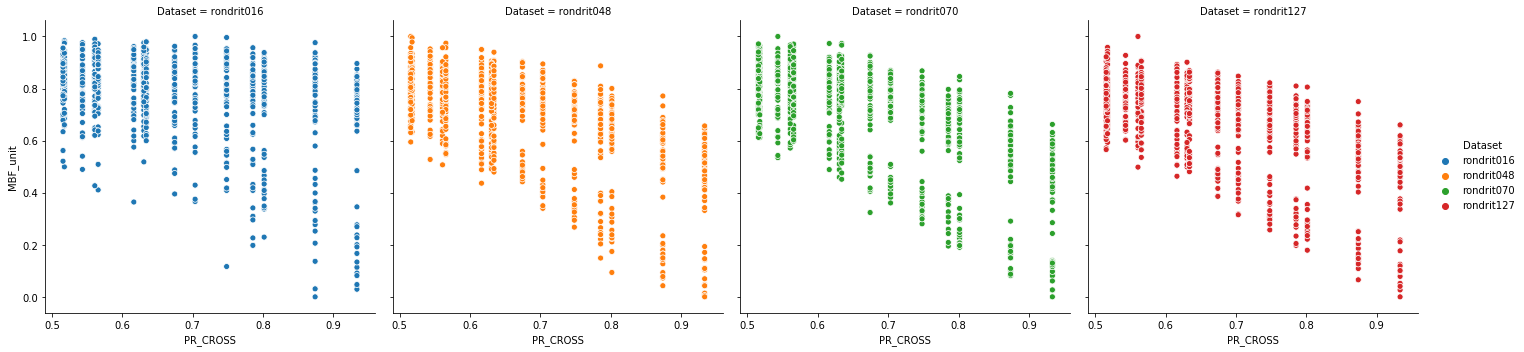

In [8]:
sns.relplot(x="PR_CROSS", y="MBF_unit", hue="Dataset",col="Dataset" ,data=def_table);


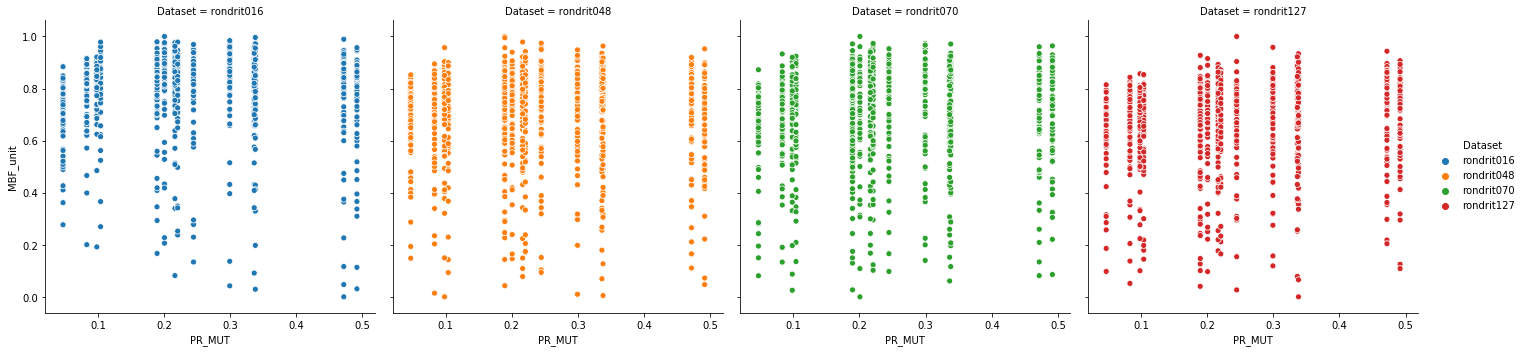

In [9]:
sns.relplot(x="PR_MUT", y="MBF_unit", hue="Dataset",col="Dataset" ,data=def_table);


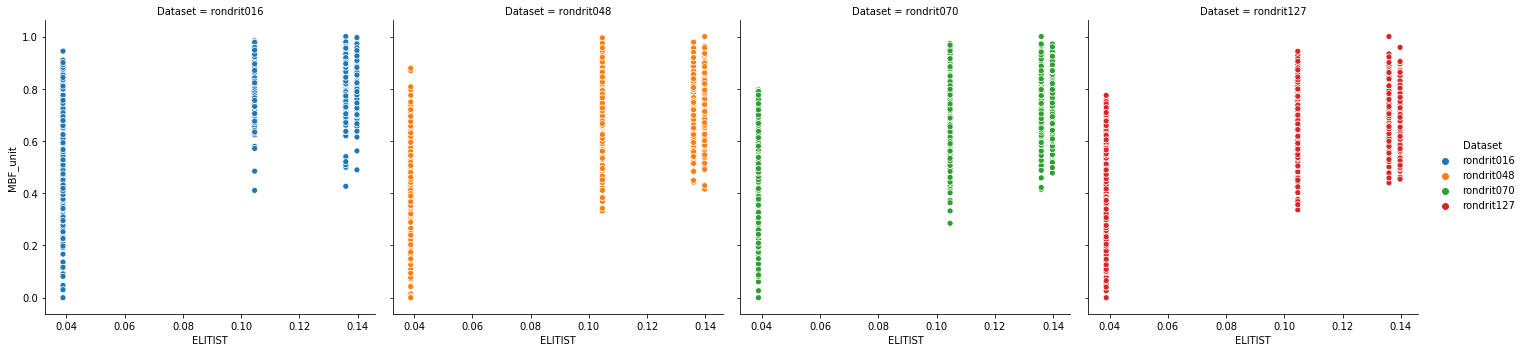

In [10]:
sns.relplot(x="ELITIST", y="MBF_unit", hue="Dataset",col="Dataset" ,data=def_table);


# Plotting MEff


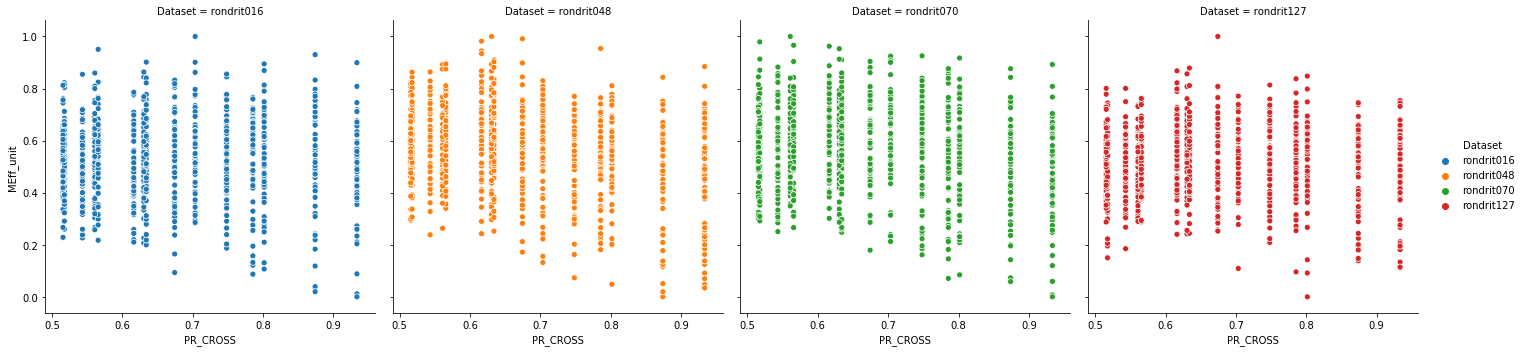

In [11]:
sns.relplot(x="PR_CROSS", y="MEff_unit", hue="Dataset",col="Dataset" ,data=def_table);


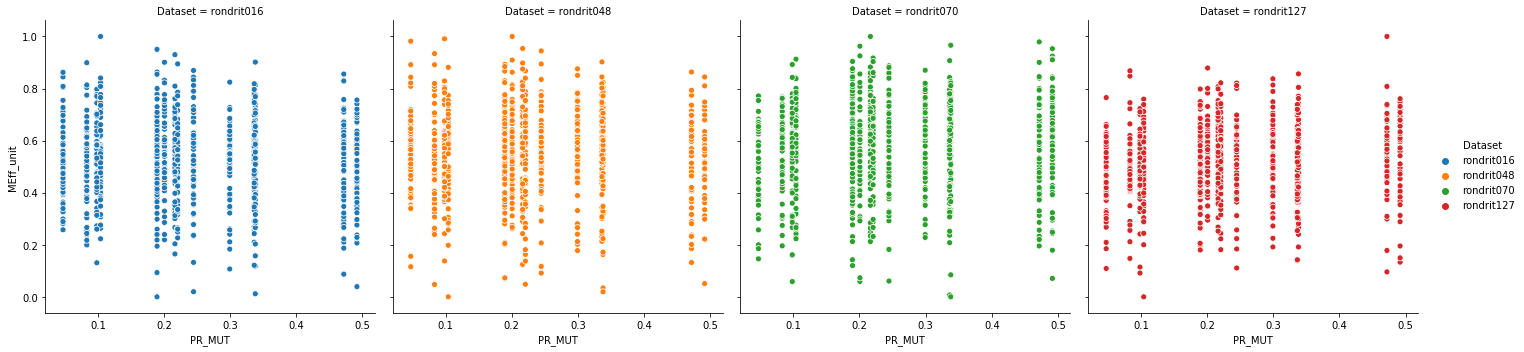

In [12]:
sns.relplot(x="PR_MUT", y="MEff_unit", hue="Dataset",col="Dataset" ,data=def_table);


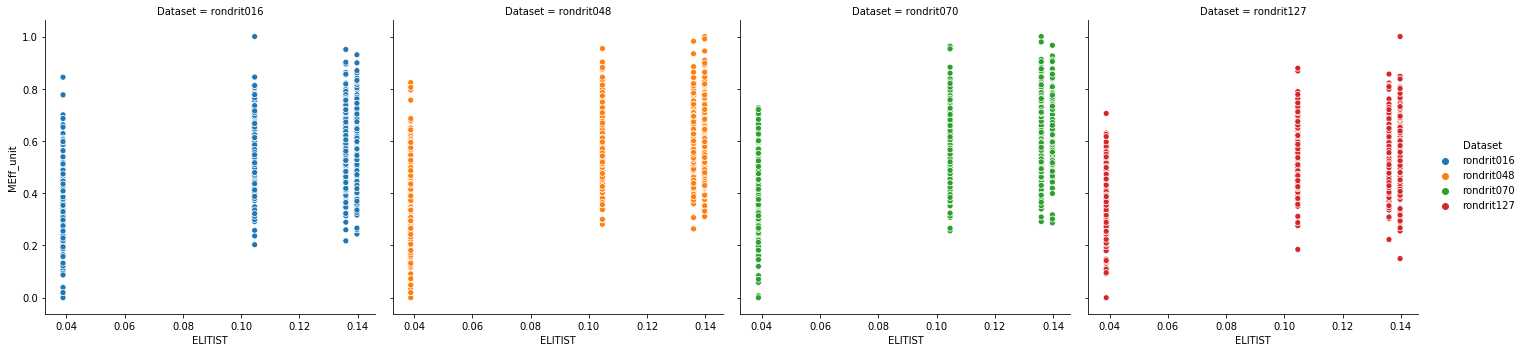

In [13]:
sns.relplot(x="ELITIST", y="MEff_unit", hue="Dataset",col="Dataset" ,data=def_table);


# Second Stage (Running Res)

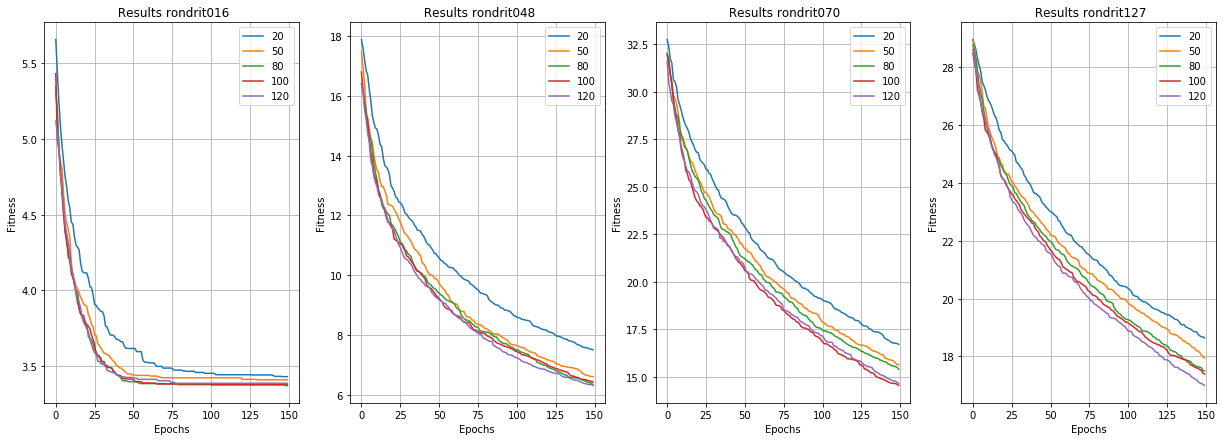

In [14]:
ts_files_1=[file for file in os.listdir(results_path) if (("Running_Res" in file) and  (".mat" in file) and ("Ap1" in file))]
dict_ts_1={}

for el in zip(ts_files_1,df_dict.keys()):
    file=el[0]; Dataset=el[1]
    dict_ts_1[Dataset]=load_matlab_ts(file,results_path)
fig, axs = plt.subplots(1, len(df_dict.keys()), sharex=True, sharey=False,figsize=(21,7))

for i,Dataset in enumerate(dict_ts_1.keys()):
    plot_ts_scal(Dataset,dict_ts_1,axs[i])

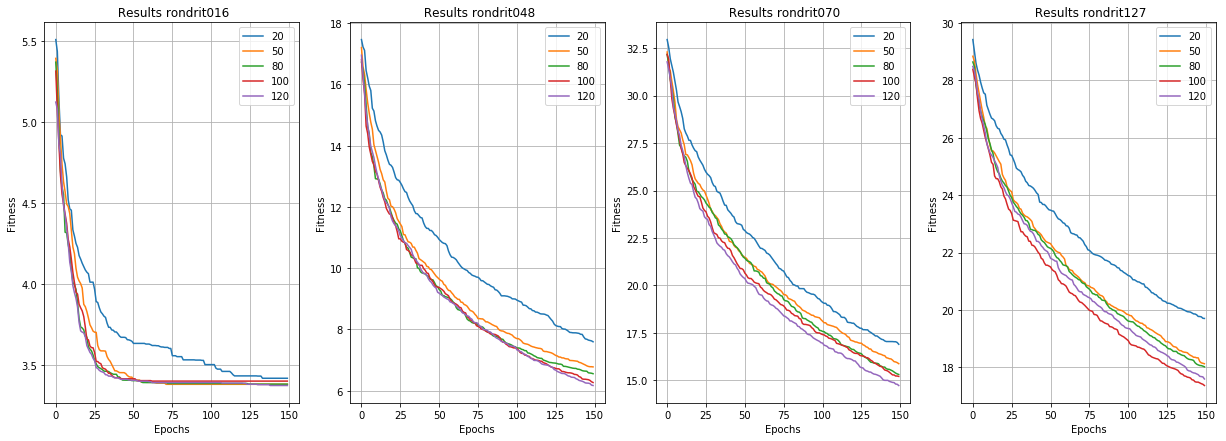

In [15]:
ts_files_2=[file for file in os.listdir(results_path) if (("Running_Res" in file) and  (".mat" in file) and ("2" in file))]
dict_ts_2={}

for el in zip(ts_files_2,df_dict.keys()):
    file=el[0]; Dataset=el[1]
    dict_ts_2[Dataset]=load_matlab_ts(file,results_path)
fig, axs = plt.subplots(1, len(df_dict.keys()), sharex=True, sharey=False,figsize=(21,7))

for i,Dataset in enumerate(dict_ts_2.keys()):
    plot_ts_scal(Dataset,dict_ts_2,axs[i])

['Running_Res_rondrit016_3.mat', 'Running_Res_rondrit048_3.mat', 'Running_Res_rondrit070_3.mat', 'Running_Res_rondrit127_3.mat']


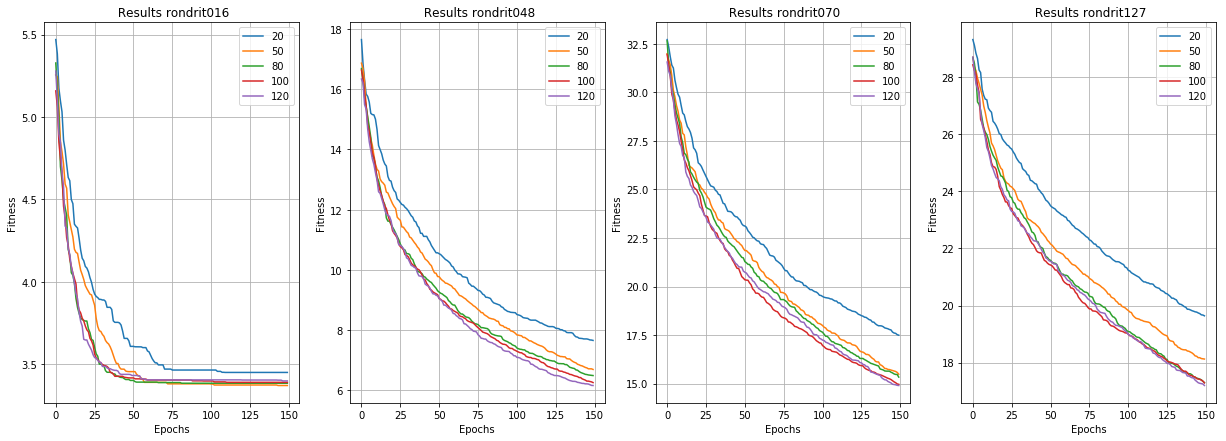

In [16]:
ts_files_3=[file for file in os.listdir(results_path) if (("Running_Res" in file) and  (".mat" in file) and ("3" in file))]
print(ts_files_3)
dict_ts_3={}

for el in zip(ts_files_3,df_dict.keys()):
    file=el[0]; Dataset=el[1]
    dict_ts_3[Dataset]=load_matlab_ts(file,results_path)
fig, axs = plt.subplots(1, len(df_dict.keys()), sharex=True, sharey=False,figsize=(21,7))

for i,Dataset in enumerate(dict_ts_3.keys()):
    plot_ts_scal(Dataset,dict_ts_3,axs[i])

# stop crit

In [17]:
#Set-up
with cd(os.path.join(os.getcwd(),'..')):
    stop_path=os.path.join(os.path.join(os.getcwd(),"Stop"))
    assert os.path.isdir(results_path), "Wrong folder"

In [22]:
Datasets=df_dict.keys()
stop_files=[file for file in os.listdir(stop_path) if "rondrit" in file ]


stop_dict={}
for dataset,file in zip(Datasets,stop_files):
    df=pd.read_csv(os.path.join(stop_path,file))
    df["Dataset"]=dataset
    stop_dict[dataset]=df

def_stop=pd.concat(stop_dict.values())

In [26]:
def_stop=round(def_stop,3)
def_stop

,Last_gen,Av_Best,StopCrit,Dataset
0,37,3.616,Crit1,rondrit016
1,1001,3.357,Crit2,rondrit016
2,150,3.406,Crit3,rondrit016
3,43,3.521,Crit4,rondrit016
4,63,3.386,Crit5,rondrit016
0,74,8.728,Crit1,rondrit048
1,80,8.382,Crit2,rondrit048
2,150,6.687,Crit3,rondrit048
3,1001,4.556,Crit4,rondrit048
4,206,6.031,Crit5,rondrit048
